<h1> Estudio de caso: Analisis exploratorio de datos</h1>

In [194]:
import pandas as pd
import numpy as np
#Importar archivo
csv_file_path='C:/Users/sebas/OneDrive/Documents/Python/Sena datos exploratorios/Nueva carpeta/Data_Caso_Propuesto.csv'

#Leer archivo
df=pd.read_csv(csv_file_path)
pd.options.display.float_format = '{:.1f}'.format
#Confirmar que la base de datos ingresa y ver el formato de cada una de las columnas
df.head()

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
0,17180,BOGOTA,CUNDINAMARCA,NaN,AV CR 7 NO. 166 - 51 LT B,0.0,0.0,COMERCIALIZABLE CON RESTRICCION,TRES,29580811900.0,LOTE COMERCIAL,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVES DE SU...
1,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.0,0.0,COMERCIALIZABLE,COMERCIAL,16460591500.0,EDIFICIO,NaN
2,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.0,0.0,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,16460591500.0,EDIFICIO,NaN
3,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,1655.1,7269.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,13768280900.0,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...
4,11409,BUGA,VALLE DEL CAUCA,VEREDA CHAMBIMBAL,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,3217197.0,22724.0,COMERCIALIZABLE FIDUCIA,RURAL,45233789820.0,LOTE MIXTO,NaN


<h2>Pregunta Objetivo</h2>

¿Cómo se relacionan las características de los inmuebles (ciudad, departamento, barrio, dirección, área de terreno, área construida, estrato, tipo de inmueble, y datos adicionales) con el precio de venta en el dataset de A&A Ltda., y cuáles de estas variables tienen el mayor impacto en la determinación de dicho precio?

<h1>Total de registros</h1>

In [195]:
#Total de registros

total_registros= df.shape[0]

print(f"La cantidad total de registros es: {total_registros}")
      

La cantidad total de registros es: 463


<h1>Total de columnas</h1>

In [196]:
#Total de columnas
total_columnas= df.shape[1]
print(f"El numero total de columnas es: {total_columnas}")

El numero total de columnas es: 12


<h1>Reporte estadistico de los datos numericos</h1>

In [197]:
print(df.describe())

       Codigo  Area Terreno  Area Construida        Precio
count   463.0         463.0            463.0         463.0
mean  18003.2       15152.0             87.5   667203190.3
std    1992.2      182710.1           1137.5  3272992027.7
min    2575.0           0.0              0.0     4650000.0
25%   18184.5           0.0              0.0    12305000.0
50%   18332.0           0.0              0.0    15870000.0
75%   18539.5           0.0              0.0   137995500.0
max   19344.0     3217197.0          22724.0 45233789820.0


<p>Se puede ver que varios datos son erroneos por lo que es pertinente organizarlos y corregirlos</p>

In [198]:
#Estadisticas de cada columna
estadisticas = {}
for columna in df.columns:
    if pd.api.types.is_numeric_dtype(df[columna]):#Busca cada una de las columnas
 
        media = df[columna].mean()
        moda = df[columna].mode()[0]
        mediana = df[columna].median()
        desviacion_estandar = df[columna].std()
        cuartiles = df[columna].quantile([0.25, 0.5, 0.75])

        estadisticas[columna] = {
            'Tipo': 'Numérica',
            'Media': media,
            'Moda': moda,
            'Mediana': mediana,
            'Desviación Estándar': desviacion_estandar,
            'Cuartiles': cuartiles.to_dict()
        }
    else: #  Estadisticas para columnas categóricas
        moda = df[columna].mode()[0]
        estadisticas[columna] = {
            'Tipo': 'Categórica',
            'Moda': moda,
        }

# Mostrar los resultados
for columna, stats in estadisticas.items():
    print(f"Estadísticas para la columna '{columna}':")
    if stats['Tipo'] == 'Numérica':
        print(f"  Media: {stats['Media']}")
        print(f"  Moda: {stats['Moda']}")
        print(f"  Mediana: {stats['Mediana']}")
        print(f"  Desviación Estándar: {stats['Desviación Estándar']}")
        print(f"  Cuartiles: {stats['Cuartiles']}")
    else:
        print(f"  Moda: {stats['Moda']}")
    print()

La moda de la categoria de ciudad es VILLAVICENCIO
Estadísticas para la columna 'Codigo':
  Media: 18003.15118790497
  Moda: 19209
  Mediana: 18332.0
  Desviación Estándar: 1992.1914989364673
  Cuartiles: {0.25: 18184.5, 0.5: 18332.0, 0.75: 18539.5}

Estadísticas para la columna 'Ciudad':
  Moda: VILLAVICENCIO

Estadísticas para la columna 'Departamento':
  Moda: META

Estadísticas para la columna 'Barrio':
  Moda: AV 30 DE AGOSTO

Estadísticas para la columna 'Direccion':
  Moda: CL 72 No. 12 - 77

Estadísticas para la columna 'Area Terreno':
  Media: 15152.036285097192
  Moda: 0.0
  Mediana: 0.0
  Desviación Estándar: 182710.1036902397
  Cuartiles: {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}

Estadísticas para la columna 'Area Construida':
  Media: 87.51727861771059
  Moda: 0.0
  Mediana: 0.0
  Desviación Estándar: 1137.4690773160282
  Cuartiles: {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}

Estadísticas para la columna 'Detalle Disponibilidad':
  Moda: COMERCIALIZABLE

Estadísticas para la columna 'Estrat

<h1>Detallado de cada columna</h1>
<h2>Ciudad:</h2>
<p>Referente a la ciudad donde esta localizado. La mayor cantidad de inmuebles se encuentran en VILLAVICENCIO</p>
<h2>Departamento:</h2>
<p>Referente a el departamento donde esta localizado el inmueble. La mayor cantidad de inmuebles se encuentran en META</p>
<h2>Barrio:</h2>
<p>Referente a el barrio donde esta ubicado el inmueble. La mayor cantidad de inmuebles se encuentran en el barrio AV 30 de agosto. Su utilidad radica realmente dependiendo de la ciudad o departamento donde se busque el inmueble </p>
<h2>Area terreno:</h2>
<p>Correponde a el espacio geografico total que tiene el inmueble. El promedio de las areas de los terrenos es 15152.04 metros cuadrados, con una desviacion estandar de 182710 esto significa que hay una gran variedad en las areas usadas.</p>
<h2>Area construida:</h2>
<p>Corresponde a el area edificado. El promedio de las areas construidas es de 87.51 metros cuadrados, una desviacion estandar bastante alta de 1137</p>
<h2>Detalle de disponibilidad:</h2>
<p>Referente a la disponibilidad que tiene el inmueble para ser comercializado, la moda es COMERCIALIZABLE a pesar de que la mayoria de categorias incluyan 'COMERCIALIZABLE' incluyen alguna referencia mas</p>
<h2>Estrato:</h2>
<p>Referente a las caracteristicas fisicas que tiene el inmueble comparando segun condiciones socioeconomicas, la moda de esta categoria es COMERCIAL, que se refiere a que son inmuebles tipo locales o para comercios</p>
<h2>Precio:</h2>
<p>El promedio de el precio es de 667.203.190 pesos colombianos, con una desviacion estandar de 32.729.92.027 </p>
<h2>Tipo de inmueble:</h2>
<p>Clasifica el inmueble segun el uso que se le pueda dar, su moda es LOCAL perteneciente a el comercio  </p>


<h1>Variables categorica y numericas</h1>


In [199]:
#Identificar las variables numericas
numericas=df.select_dtypes(include=['number']).columns.tolist()
cantidad_numericas=len(numericas)
#Identificar las variables categoricas
categoricas=df.select_dtypes(include=['object']).columns.tolist()
cantidad_categoricas=len(categoricas)


#Imprimir cada una de las variables segun su clasificacion
print(f'Hay {cantidad_numericas} variables numericas y son:')
for i in range(cantidad_numericas):
    print('- ',numericas[i])
print(f'Hay {cantidad_categoricas} variables categoricas y son:')
for i in range(cantidad_categoricas):
    print('- ',categoricas[i])

Hay 4 variables numericas y son:
-  Codigo
-  Area Terreno
-  Area Construida
-  Precio
Hay 8 variables categoricas y son:
-  Ciudad
-  Departamento
-  Barrio
-  Direccion
-  Detalle Disponibilidad
-  Estrato
-  Tipo de Inmueble
-  Datos Adicionales


<h1>Valores nulos</h1>

In [200]:
#Identificar valores vacios
nulas=df.isnull().sum()
#Identificar valores iguales a 0
ceros=(df==0).sum()

#Agregar los valores a variables
columnas_nulas=nulas[nulas>0]
columnas_ceros=ceros[ceros>0]

#Imprimir los datos obtenidos
print('Columnas con valores nulos:')
print(columnas_nulas)
print('Columnas con valores ceros:')
print(columnas_ceros)


Columnas con valores nulos:
Barrio               423
Datos Adicionales    345
dtype: int64
Columnas con valores ceros:
Area Terreno       445
Area Construida    453
dtype: int64


<h1>Eliminacion de datos nulos</h1>
<p>No tiene sentido remplazar los datos de las las dos variables categoricas que contienen valores nulos por la moda, por lo que se remplaza por 'Otros' </p>
<p>Las variables numericas con valores ceros seran reemplazadas por la moda</p>

In [201]:
#Variables Categoricas, remplazando sus valores vacios por Otros
df.fillna('Otros',inplace=True)


#Variables numericas
columnas_numericas = df.select_dtypes(include=['number']).columns
promedios = df[columnas_numericas].mean()

#Remplazar por el promedio
df[columnas_numericas] = df[columnas_numericas].replace(0, np.nan)
df[columnas_numericas] = df[columnas_numericas].fillna(promedios)

#Imprimir resultados
print('Dataframe luego de cambiar los valores iguales a 0 por los promedios y los nulos por "Otros"')
print(df)


Dataframe luego de cambiar los valores iguales a 0 por los promedios y los nulos por "Otros"
     Codigo    Ciudad     Departamento             Barrio  \
0     17180    BOGOTA     CUNDINAMARCA              Otros   
1     19292    BOGOTA     CUNDINAMARCA              Otros   
2     19292    BOGOTA     CUNDINAMARCA              Otros   
3      2575  SOGAMOSO           BOYACÁ             CENTRO   
4     11409      BUGA  VALLE DEL CAUCA  VEREDA CHAMBIMBAL   
..      ...       ...              ...                ...   
458   12709      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
459   17992    BOGOTA     CUNDINAMARCA              Otros   
460   12708      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
461   12706      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
462   12707      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   

                                             Direccion  Area Terreno  \
0                            AV CR 7 NO. 166 - 51 LT B       15152.0   
1                             

<h1>Registros duplicados</h1>

In [202]:
#Seleccionar y guardar los registros duplicados en una variable
duplicados=df.duplicated()

#Guardar en una variable la cantidad de datos duplicados
total_duplicados=duplicados.sum()

#Imprimir los datos obtenidos
if total_duplicados>0:
    print(f'La cantidad de registros duplicados es {total_duplicados} y son: ')
    for i in range(total_duplicados):
        print(duplicados[i])
else:
    print('No hay duplicados')


No hay duplicados


<h1>Graficos</h1>

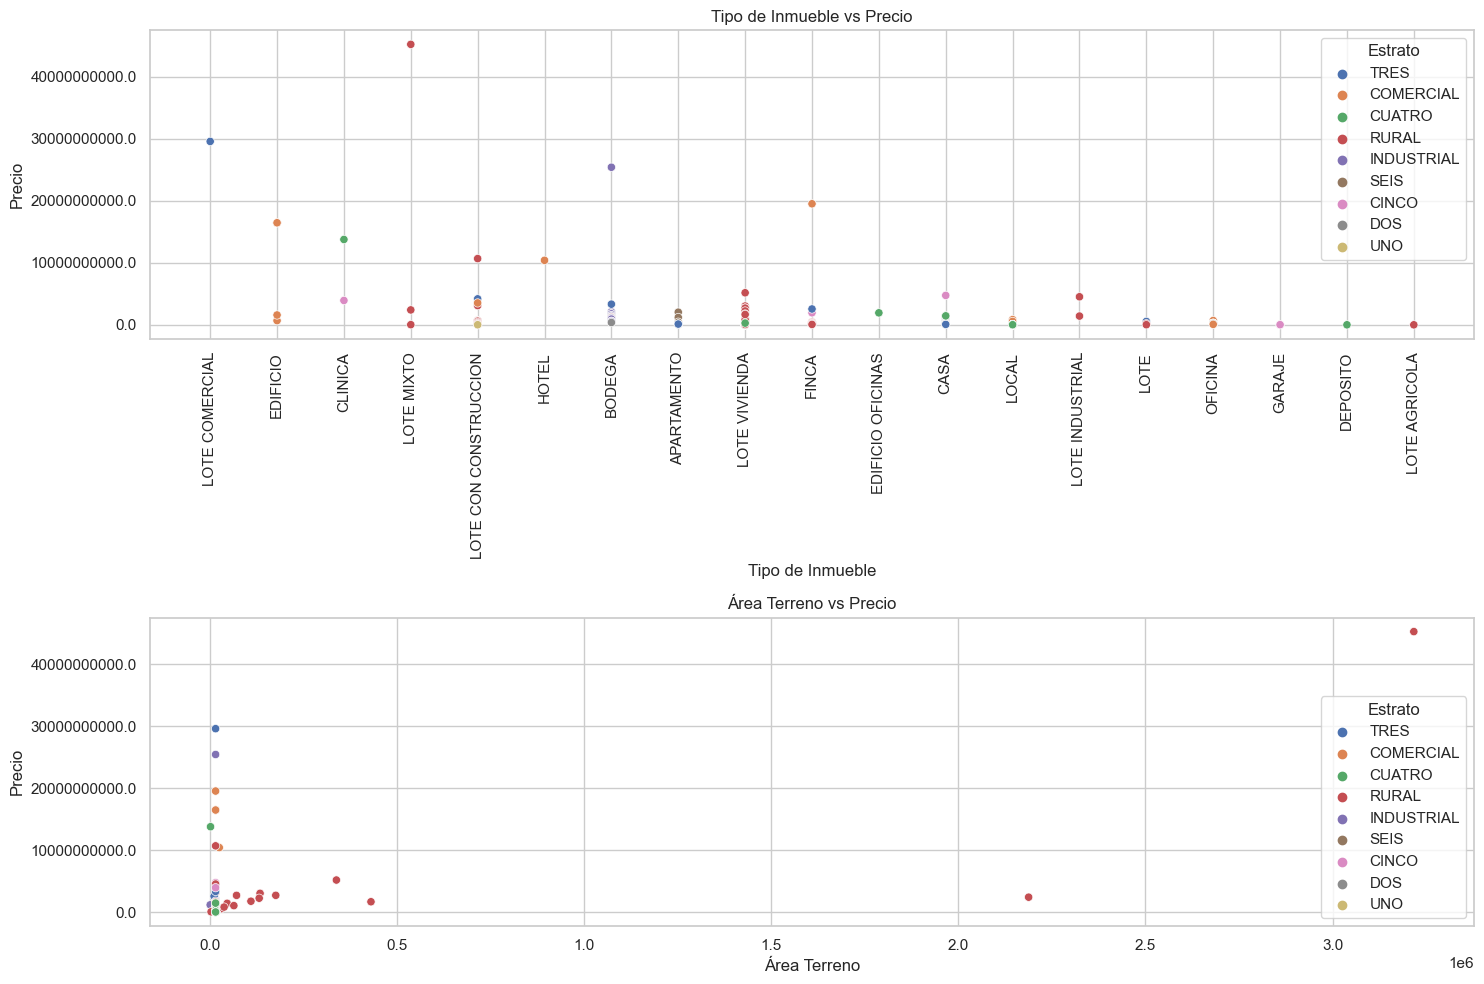

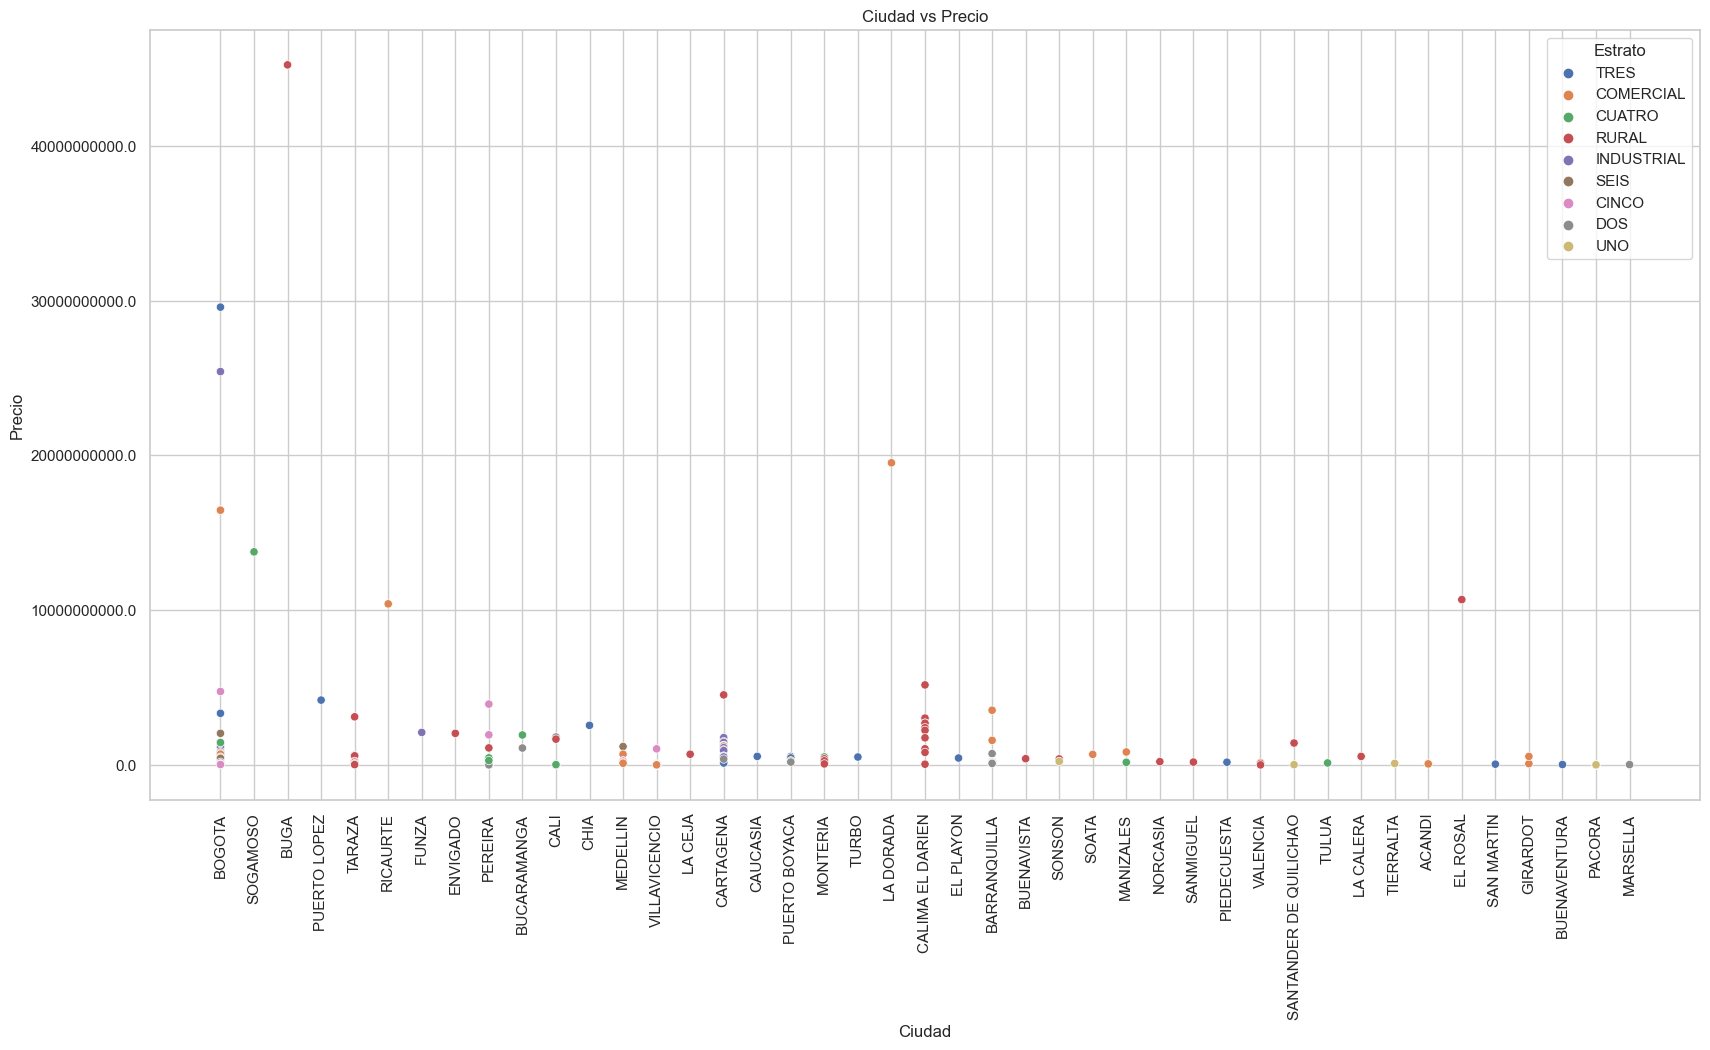

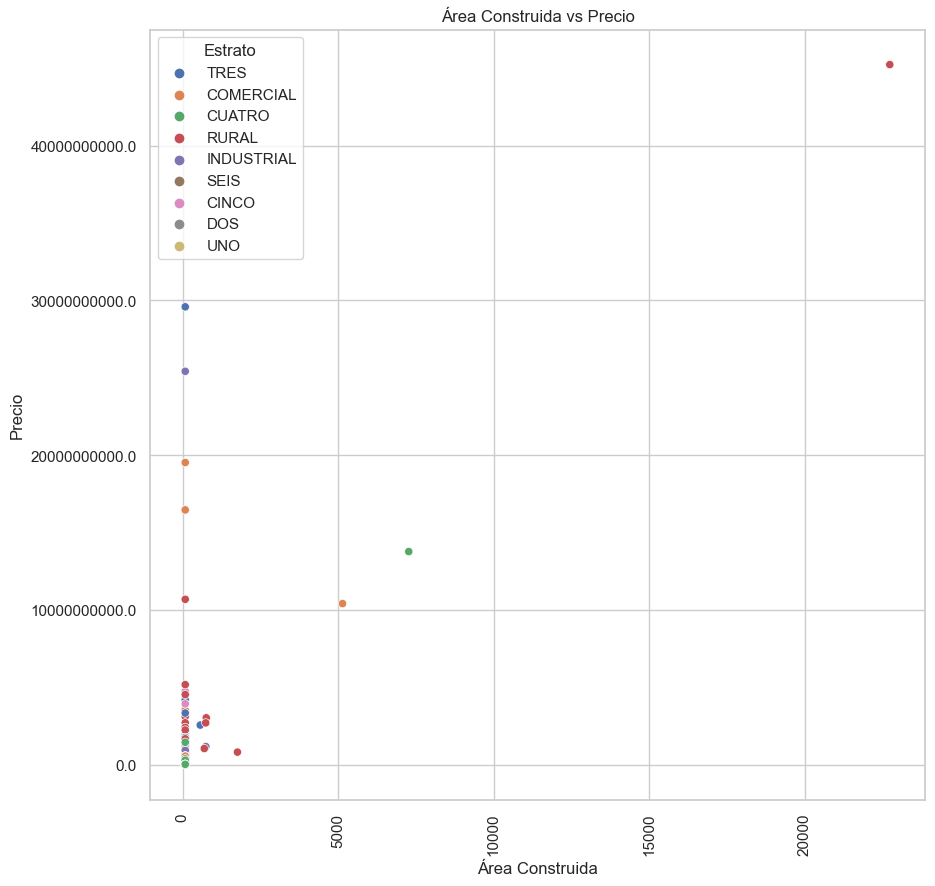

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Dar formato a la variable precio
def y_format(x, _): 
    return '{:.1f}'.format(x)
sns.set(style="whitegrid")

#Quitar valores que dañan la precision de el analisis
umbral = 100000000000
df = df[df['Precio'] <= umbral]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Gráfico 1: Tipo de Inmueble vs Precio
sns.scatterplot(x='Tipo de Inmueble', y='Precio', hue='Estrato', data=df, ax=axes[0])
axes[0].set_title('Tipo de Inmueble vs Precio')
axes[0].set_xlabel('Tipo de Inmueble')
axes[0].set_ylabel('Precio')
axes[0].yaxis.set_major_formatter(FuncFormatter(y_format))
axes[0].tick_params(axis='x', rotation=90) #Rotar las etiquetas

# Gráfico 2: Área Terreno vs Precio
sns.scatterplot(x='Area Terreno', y='Precio', hue='Estrato', data=df, ax=axes[1])
axes[1].set_title('Área Terreno vs Precio')
axes[1].set_xlabel('Área Terreno')
axes[1].set_ylabel('Precio')
axes[1].yaxis.set_major_formatter(FuncFormatter(y_format))
axes[0].tick_params(axis='x', rotation=90) #Rotar las etiquetas
plt.tight_layout()
plt.show()

# Gráfico 3: Ciudad vs Precio
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x='Ciudad', y='Precio', hue='Estrato', data=df, ax=ax)
ax.set_title('Ciudad vs Precio')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Precio')
ax.yaxis.set_major_formatter(FuncFormatter(y_format))
ax.tick_params(axis='x', rotation=90) #Rotar las etiquetas
plt.show()

# Gráfico 4: Área Construida vs Precio
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='Area Construida', y='Precio', hue='Estrato', data=df, ax=ax)
ax.set_title('Área Construida vs Precio')
ax.set_xlabel('Área Construida')
ax.set_ylabel('Precio')
ax.yaxis.set_major_formatter(FuncFormatter(y_format))
ax.tick_params(axis='x', rotation=90) #Rotar las etiquetas

plt.show()

<h1>Histograma</h1>

C:\Users\sebas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


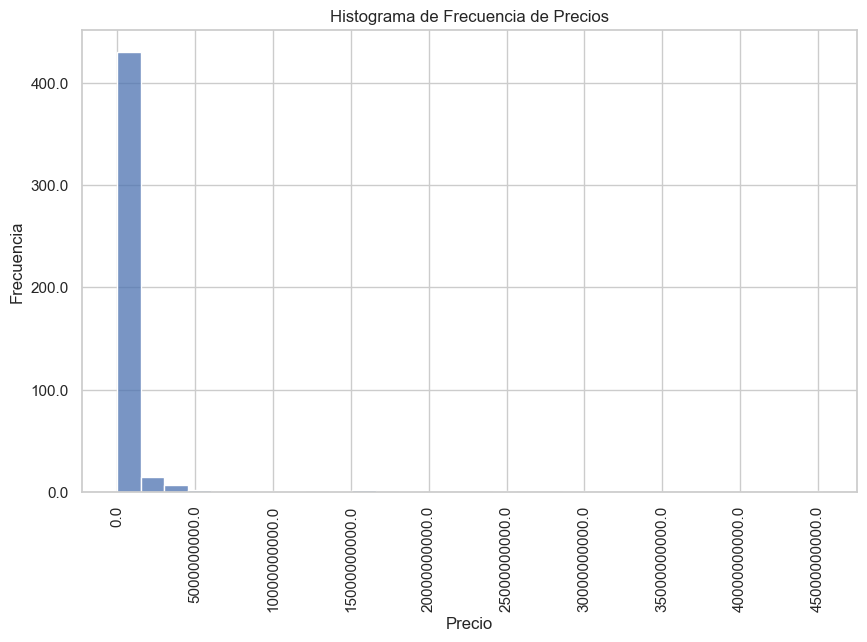

In [204]:
def format_num(value, _):
    return '{:.1f}'.format(value)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Precio'], bins=30)
ax.set_title('Histograma de Frecuencia de Precios')
ax.set_xlabel('Precio')
ax.set_ylabel('Frecuencia')
ax.xaxis.set_major_formatter(FuncFormatter(format_num))
ax.yaxis.set_major_formatter(FuncFormatter(format_num))
ax.xaxis.set_major_locator(MaxNLocator(nbins=10))  # Cambia el número de bins según sea necesario
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()



<h3>Analizando los graficos y el histograma se pueden sacar conclusiones</h3>
<list>
    <p>No existe una relacion directa entre el tipo de inmueble y el precio</p>
    <p>El area de terreno solo se denota en el estrato de rural, dando lugar a concluir que hablando de la propiedad rural si existe una relacion directa entre el area del terreno y el precio</p>
    <p>A pesar de que se puede distinguir que algunas ciudades son mas costosas, como el caso de Bogota, Cartagena, Puerto lopez y Pereira, realmente no existe una gran relacion entre la ciudad y el precio</p>
    <p>El grafico de area construida es probablemente el que mas informacion aporta a este analisis, puesto que se puede ver la clara relacion que tiene el precio con el estrato, añadiendo ademas concluyendo que no es clara la relacion entre el area construida y el precio, esto por los inmuebles ubicados en la ruralidad</p>

</list>

<p>Analizando las diferentes caracteristicas de los inmuebles, vemos como varias de ellas realmente no tienen gran impacto en la determinacion del precio, se concluye que la variable que mas tiene impacto es la de el estrato, el area de terreno y el area construida, esta ultima con algunas excepciones ya nombradas.</p>